# ODE to joy
Jens Hahn  -  27/05/2016
## Countinuous deterministic modelling with differential equations

Numerical integration
------------------------
In principle, every numerical procedure to solve an ODE is based on the so-called Euler's method. It's very easy to understand, you just have to read the $\frac{\text{d}\vec{x}}{\text{d}t}$ as a $\frac{\Delta \vec{x}}{\Delta t}$. Then you can multiply both sides of the equation with $\Delta t$ and you have an equation describing the change of your variables during a certain time intervall $\Delta t$:

$$ \Delta \vec{x} = \vec{f}(\vec{x}, t)\times \Delta t$$

Of course, the smaller you choose the time intervall $\Delta t$, the more accurate your result will be in comparison to the analytical solution.     
So it's clear, we chose a tiny one, right? Well, not exactly, the smaller your time intervall the longer the simulation will take. Therefore, we need a compromise and here the provided software will help us by constantly testing and observing the numerical solution and adapt the "step size" $\Delta t$ automatically.

## Euler's method
The simple Euler's method can be written in a short formula.    
$h$ is the difference of time step: h_i = $t_{i+1} - t_i$     
Then, the solution looks like that:

$$\Phi (t,x,h) = x + h\cdot f(t,x)$$

Unfortunately, this method is highly dependent on the size of $h_i$, the smaller the more accurate is the solution.

<img src="Euler.png">

Let's test the method with our well-known predator-prey model (Lotka-Volterra):

In [215]:
import numpy as np

# Lotka Volterra model
# initialise parameters
k1 = 1.5
k2 = 1.
k3 = 3.
k4 = 1.

def my_dxdt(s,t):
    """
    Function returns values of derivatives of Lotka Volterra model
    """
    return [k1*s[0] - k2*s[0]*s[1], - k3*s[1]+k4*s[0]*s[1]]

In [169]:
def my_euler_solver(dxdt, s0, timegrid):
    """
    Implementation of a simple Euler method (constant stepsize)
    """
    # first species values are s0
    s = s0
    # do timesteps
    for j, time in enumerate(timegrid):
        # first time step, just save initial values
        if j == 0:
            result = [[value] for value in s0]
            continue
        # next time step, calculate values and save them
        for i, species in enumerate(s):
            hi = (timegrid[j] - timegrid[j-1])
            species = species + dxdt(s,time)[i] * hi
            result[i].append(species)
        # update species with new values
        s[0] = result[0][-1]
        s[1] = result[1][-1]
    return result

To test the accuracy, we run the simulation with 2 different time grids, one with a step size of 0.01 and one with step size 0.001

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

# timegrids
timegrid_e3 = np.linspace(0,20,2000)
timegrid_e4 = np.linspace(0,20,20000)

# get solutions
s0=[5,10]
my_euler_result_e3 = my_euler_solver(my_dxdt, s0, timegrid_e3)
s0=[5,10]
my_euler_result_e4 = my_euler_solver(my_dxdt, s0, timegrid_e4)


## Heun's method
If you want to increase the accuracy of your method, you could use the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) you know from the approximation of integrals. The second point is of course missing, but here you could use Euler's method! 

As we will see, this method is a huge improvement compared to Euler's method! 

$$\Phi (t,x,h) = x + \frac{h}{2}\Bigl(f(t,x)+f\bigl(t+h,\underbrace{x+h\cdot f(t,x)}_{Euler's\ method}\bigr)\Bigr)$$


## Runge - Kutta method
The idea of Runge and Kutta were quite straight forward: **Why not using Heun's method recursive?** To get the second point you do not use Euler's method but again the trapezoidal rule... and again... and again. This method is still used and very good for most of the ODE systems!

In [171]:
def my_heun_solver(dxdt, s0, timegrid):
    """
    Implementation of the Heun method (constant stepsize)
    """
    # first species values are s0
    s = s0
    # do timesteps
    for j, time in enumerate(timegrid):
        # first time step, just save initial values
        if j == 0:
            result = [[value] for value in s0]
            continue
        # next time step, calculate values and save them
        for i, species in enumerate(s):
            hi = (timegrid[j] - timegrid[j-1])
            species = species + (hi/2)*(dxdt(time,s)[i]+dxdt(time+hi,[s[k]+hi*dxdt(time,s)[k] for k in range(len(s))])[i])
            result[i].append(species)
        # update species with new values
        s[0] = result[0][-1]
        s[1] = result[1][-1]
    return result

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

# timegrids
timegrid_e3 = np.linspace(0,20,2000)
timegrid_e4 = np.linspace(0,20,20000)

# plot results
s0=[5,10]
my_heun_result_e3 = my_heun_solver(my_heun_dxdt, s0, timegrid_e3)
s0=[5,10]
my_heun_result_e4 = my_heun_solver(my_heun_dxdt, s0, timegrid_e4)

In [228]:
timegrid = np.linspace(0,20,2000)
s0 = [5,10]
result = scipy.integrate.odeint(dxdt, s0, timegrid)

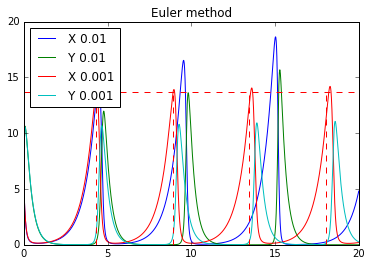

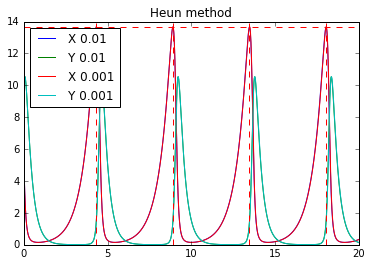

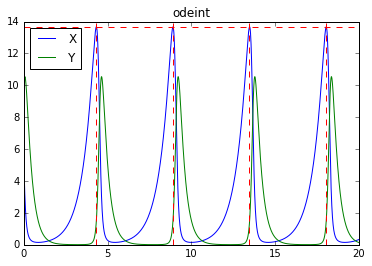

In [243]:
plt.figure(1)
plt.plot(timegrid_e3, my_euler_result_e3[0], label="X 0.01")
plt.plot(timegrid_e3, my_euler_result_e3[1], label="Y 0.01")
plt.plot(timegrid_e4, my_euler_result_e4[0], label="X 0.001")
plt.plot(timegrid_e4, my_euler_result_e4[1], label="Y 0.001")
plt.plot([0,20], [13.67, 13.67], 'r--')
plt.plot([4.32,4.32], [0,14], 'r--')
plt.plot([8.9,8.9], [0,14], 'r--')
plt.plot([13.46,13.46], [0,14], 'r--')
plt.plot([18.06,18.06], [0,14], 'r--')
plt.legend(loc=2)
plt.title('Euler method')

plt.figure(2)
plt.plot(timegrid_e3, my_heun_result_e3[0], label="X 0.01")
plt.plot(timegrid_e3, my_heun_result_e3[1], label="Y 0.01")
plt.plot(timegrid_e4, my_heun_result_e4[0], label="X 0.001")
plt.plot(timegrid_e4, my_heun_result_e4[1], label="Y 0.001")
plt.plot([0,20], [13.67, 13.67], 'r--')
plt.plot([4.32,4.32], [0,14], 'r--')
plt.plot([8.9,8.9], [0,14], 'r--')
plt.plot([13.46,13.46], [0,14], 'r--')
plt.plot([18.06,18.06], [0,14], 'r--')
plt.legend(loc=2)
plt.title('Heun method')

plt.figure(3)
plt.plot(timegrid, result.T[0], label='X')
plt.plot(timegrid, result.T[1], label='Y')
plt.plot([0,20], [13.67, 13.67], 'r--')
plt.plot([4.32,4.32], [0,14], 'r--')
plt.plot([8.9,8.9], [0,14], 'r--')
plt.plot([13.46,13.46], [0,14], 'r--')
plt.plot([18.06,18.06], [0,14], 'r--')
plt.legend(loc=2)
plt.title('odeint')

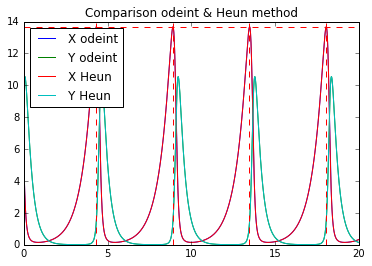

In [241]:
plt.plot(timegrid, result.T[0], label='X odeint')
plt.plot(timegrid, result.T[1], label='Y odeint')
plt.legend(loc=2)

plt.plot(timegrid_e4, my_heun_result_e4[0], label="X Heun")
plt.plot(timegrid_e4, my_heun_result_e4[1], label="Y Heun")
plt.plot([0,20], [13.67, 13.67], 'r--')
plt.plot([4.32,4.32], [0,14], 'r--')
plt.plot([8.9,8.9], [0,14], 'r--')
plt.plot([13.46,13.46], [0,14], 'r--')
plt.plot([18.06,18.06], [0,14], 'r--')
plt.legend(loc=2)
plt.title('Comparison odeint & Heun method')

In [217]:
print(timegrid_e4[1])

0.00100010001


In [240]:
for i, value in enumerate(result.T[0]):
    if round(100 * value) == round(max(result.T[0] * 100)):
        print(timegrid[i])

4.32216108054
4.33216608304
8.89444722361
8.90445222611
13.4767383692
13.4867433717
18.0590295148
